In [1]:
import pandas as pd

In [3]:
df1 = pd.read_excel(r"c:\Users\Admin\Downloads\Problem Statement 2_ Data set.xlsx", sheet_name='Data Set')
df2 = pd.read_excel(r"c:\Users\Admin\Downloads\Problem Statement 2_ Data set.xlsx", sheet_name='Treshold')

In [5]:
df1['Machine'].unique()

array(['Excavator_1', 'Articulated_Truck_1', 'Backhoe_Loader_1',
       'Dozer_1', 'Asphalt_Paver_1'], dtype=object)

In [6]:
df1['Component'].unique()

array(['Engine', 'Fuel', 'Drive', 'Misc'], dtype=object)

In [7]:
df1['Parameter'].unique()

array(['Temparature', 'Water in Fuel', 'Transmission Pressure',
       'Oil Pressure', 'Brake Control', 'Pedal Sensor',
       'Exhaust Gas Temparature', 'Air Filter Pressure', 'System Voltage',
       'Hydraulic Pump Rate', 'Speed', 'Level', 'Pressure'], dtype=object)

In [8]:
Machine = 'Excavator_1'
Parameter = 'Temparature'
Component = 'Engine'
#extracted_data = df1[(df1['Machine'] == Machine) & (df1['Parameter'] == Parameter)]
extracted_data = df1[(df1['Machine'] == Machine)]
extracted_data

,Id,Time,Machine,Component,Parameter,Value
0,48,2022-06-03 08:09:29,Excavator_1,Engine,Temparature,104.000000
4,42,2022-06-28 04:06:30,Excavator_1,Engine,Oil Pressure,39.000000
8,39,2022-05-13 03:23:02,Excavator_1,Drive,Pedal Sensor,4.533982
11,34,2022-05-06 19:46:07,Excavator_1,Misc,Exhaust Gas Temparature,195.000000
14,32,2022-06-16 19:53:48,Excavator_1,Misc,Air Filter Pressure,34.000000
...,...,...,...,...,...,...
767,22,2022-05-17 15:55:05,Excavator_1,Fuel,Level,9.000000
790,22,2022-05-07 11:39:05,Excavator_1,Drive,Pedal Sensor,4.816567
792,4,2022-06-11 14:27:32,Excavator_1,Engine,Temparature,104.000000
794,1,2022-05-05 13:42:55,Excavator_1,Engine,Speed,1755.000000


In [9]:
Given_parameters = df2['Parameter'].tolist()

In [10]:
for i, row in extracted_data.iterrows():
    if row['Parameter'] not in Given_parameters:
        extracted_data.at[i, 'Parameter'] = f"{row['Component']} {row['Parameter']}"
extracted_data

,Id,Time,Machine,Component,Parameter,Value
0,48,2022-06-03 08:09:29,Excavator_1,Engine,Engine Temparature,104.000000
4,42,2022-06-28 04:06:30,Excavator_1,Engine,Engine Oil Pressure,39.000000
8,39,2022-05-13 03:23:02,Excavator_1,Drive,Pedal Sensor,4.533982
11,34,2022-05-06 19:46:07,Excavator_1,Misc,Exhaust Gas Temparature,195.000000
14,32,2022-06-16 19:53:48,Excavator_1,Misc,Misc Air Filter Pressure,34.000000
...,...,...,...,...,...,...
767,22,2022-05-17 15:55:05,Excavator_1,Fuel,Fuel Level,9.000000
790,22,2022-05-07 11:39:05,Excavator_1,Drive,Pedal Sensor,4.816567
792,4,2022-06-11 14:27:32,Excavator_1,Engine,Engine Temparature,104.000000
794,1,2022-05-05 13:42:55,Excavator_1,Engine,Engine Speed,1755.000000


In [11]:
sorted_df = extracted_data.sort_values(by=['Machine','Parameter','Time'])

In [12]:
sorted_df['Time'] = pd.to_datetime(sorted_df['Time']).dt.tz_localize(None)

In [14]:
sorted_df.to_excel(r"c:\Users\Admin\Downloads\Machine_Component_timeline.xlsx", index = False)

In [15]:
sorted_df['rolling_mean'] = sorted_df.groupby(['Machine', 'Parameter'])['Value'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
sorted_df['lag_1'] = sorted_df.groupby(['Machine', 'Parameter'])['Value'].shift(1)

print(sorted_df)

     Id                Time      Machine Component              Parameter  \
290  17 2022-05-10 15:23:39  Excavator_1     Drive          Brake Control   
90   19 2022-05-16 16:26:30  Excavator_1     Drive          Brake Control   
507  37 2022-05-18 14:22:03  Excavator_1     Drive          Brake Control   
465   9 2022-05-19 16:41:33  Excavator_1     Drive          Brake Control   
535  36 2022-05-26 03:39:25  Excavator_1     Drive          Brake Control   
..   ..                 ...          ...       ...                    ...   
292  32 2022-06-20 05:53:54  Excavator_1     Drive  Transmission Pressure   
737  40 2022-06-21 03:03:40  Excavator_1     Drive  Transmission Pressure   
234  30 2022-06-24 15:39:38  Excavator_1     Drive  Transmission Pressure   
37   34 2022-06-27 04:19:39  Excavator_1     Drive  Transmission Pressure   
60   21 2022-06-27 13:06:53  Excavator_1     Drive  Transmission Pressure   

     Value  rolling_mean  lag_1  
290    4.0      4.000000    NaN  
90     

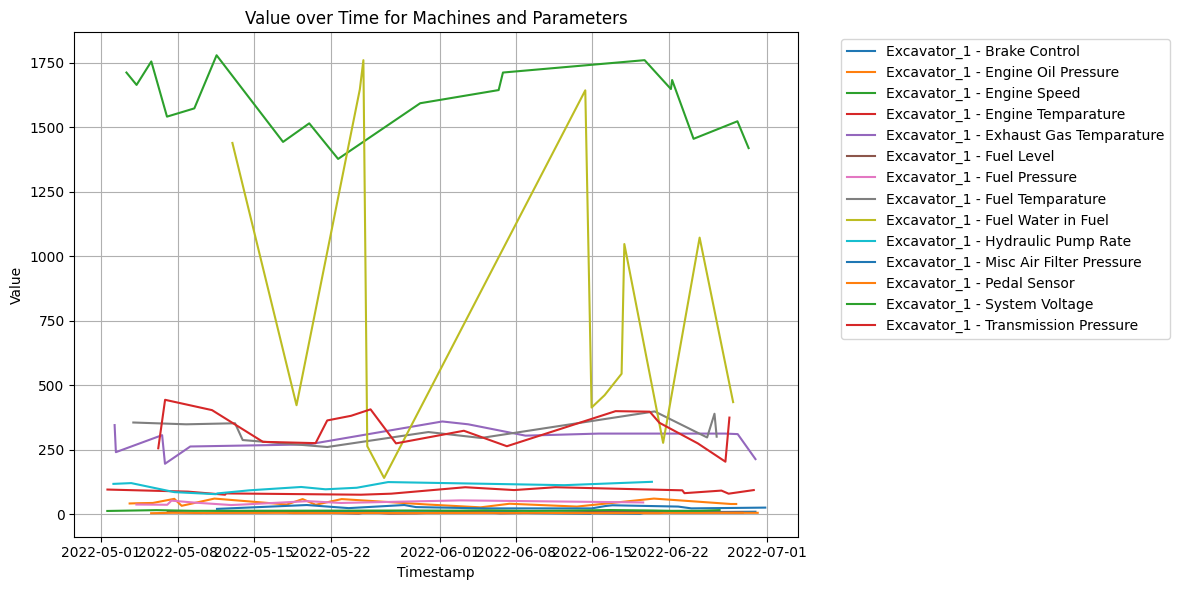

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for machine, group in sorted_df.groupby('Machine'):
    for parameter, data in group.groupby('Parameter'):
        plt.plot(data['Time'], data['Value'], label=f'{machine} - {parameter}')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Value over Time for Machines and Parameters')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
pip install --upgrade statsmodels

In [17]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(sorted_df['Value'], order=(1,1,1))
model_fit = model.fit()

# Forecasting next value
forecast = model_fit.forecast()

# Print the forecasted value
print(f"Forecasted next value: {forecast.iloc[0]}")

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Forecasted next value: 320.0134938002786


c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\

Forecasted next 15 values:
18    43.320315
19    41.764214
20    42.324694
21    42.122819
22    42.195531
23    42.169341
24    42.178774
25    42.175377
26    42.176601
27    42.176160
28    42.176319
29    42.176261
30    42.176282
31    42.176275
32    42.176277
Name: predicted_mean, dtype: float64


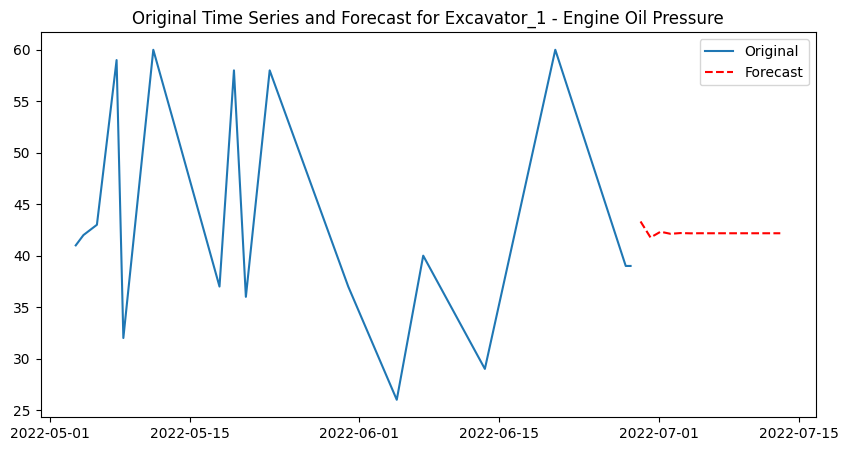

In [26]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Convert 'Time' to datetime
sorted_df['Time'] = pd.to_datetime(sorted_df['Time'])

# Filter for a specific machine and parameter
machine = 'Excavator_1'
parameter = 'Engine Oil Pressure'
filtered_df = sorted_df[(sorted_df['Machine'] == machine) & (sorted_df['Parameter'] == parameter)]

# Ensure the data is sorted by time
filtered_df = filtered_df.sort_values('Time')

# Set 'Time' as index
filtered_df.set_index('Time', inplace=True)

# Fit the ARIMA model
model = ARIMA(filtered_df['Value'], order=(1,1,1))
model_fit = model.fit()

# Forecast the next 5 values
forecast_steps = 15
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print(f"Forecasted next {forecast_steps} values:\n{forecast}")

# Create a datetime index for the forecast
forecast_index = pd.date_range(start=filtered_df.index[-1], periods=forecast_steps+1, inclusive='right')

# Plot the forecasted values along with the original series
plt.figure(figsize=(10, 5))
plt.plot(filtered_df['Value'], label='Original')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', color='red')
plt.legend()
plt.title(f'Original Time Series and Forecast for {machine} - {parameter}')
plt.show()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\

Forecasted next 15 values:
18    1468.832267
19    1442.982956
20    1456.391676
21    1449.436219
22    1453.044198
23    1451.172644
24    1452.143468
25    1451.639876
26    1451.901103
27    1451.765598
28    1451.835888
29    1451.799426
30    1451.818340
31    1451.808529
32    1451.813618
Name: predicted_mean, dtype: float64


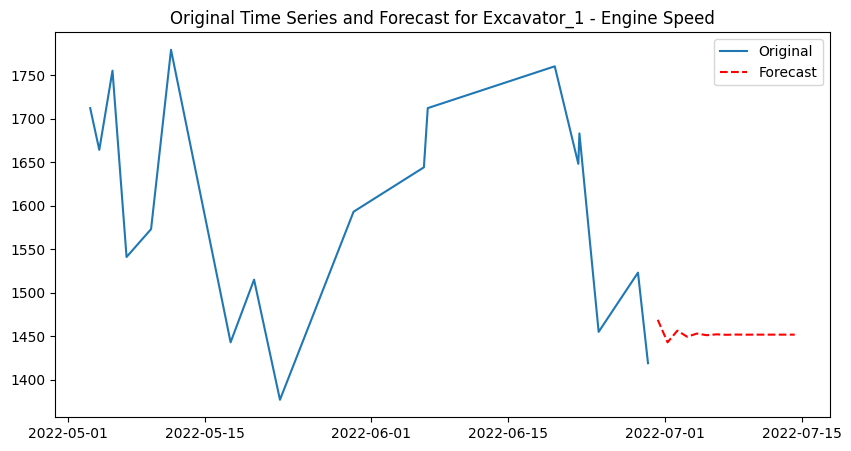

In [28]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Convert 'Time' to datetime
sorted_df['Time'] = pd.to_datetime(sorted_df['Time'])

# Filter for a specific machine and parameter
machine = 'Excavator_1'
parameter = 'Engine Speed'
filtered_df = sorted_df[(sorted_df['Machine'] == machine) & (sorted_df['Parameter'] == parameter)]

# Ensure the data is sorted by time
filtered_df = filtered_df.sort_values('Time')

# Set 'Time' as index
filtered_df.set_index('Time', inplace=True)

# Fit the ARIMA model
model = ARIMA(filtered_df['Value'], order=(1,1,1))
model_fit = model.fit()

# Forecast the next 5 values
forecast_steps = 15
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print(f"Forecasted next {forecast_steps} values:\n{forecast}")

# Create a datetime index for the forecast
forecast_index = pd.date_range(start=filtered_df.index[-1], periods=forecast_steps+1, inclusive='right')

# Plot the forecasted values along with the original series
plt.figure(figsize=(10, 5))
plt.plot(filtered_df['Value'], label='Original')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', color='red')
plt.legend()
plt.title(f'Original Time Series and Forecast for {machine} - {parameter}')
plt.show()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\

Forecasted next 10 values:
16    3.696111
17    4.113415
18    4.690078
19    4.337169
20    3.970585
21    4.309466
22    4.489153
23    4.221558
24    4.144933
25    4.350131
Name: predicted_mean, dtype: float64


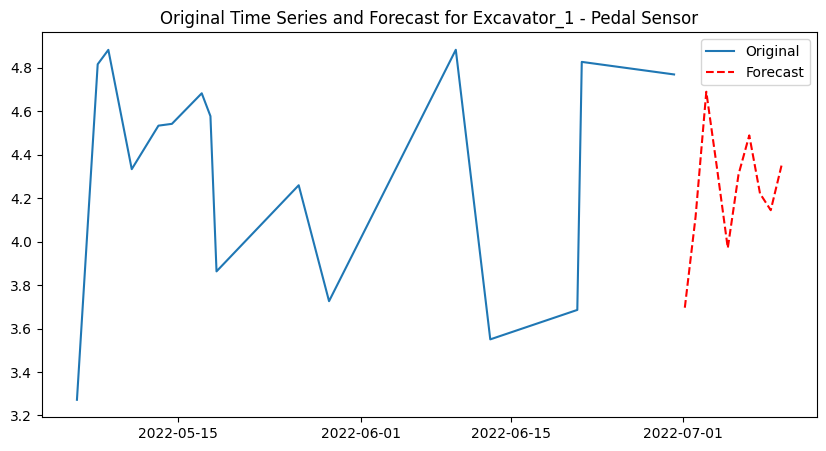

In [30]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Convert 'Time' to datetime
sorted_df['Time'] = pd.to_datetime(sorted_df['Time'])

# Filter for a specific machine and parameter
machine = 'Excavator_1'
parameter = 'Pedal Sensor'
filtered_df = sorted_df[(sorted_df['Machine'] == machine) & (sorted_df['Parameter'] == parameter)]

# Ensure the data is sorted by time
filtered_df = filtered_df.sort_values('Time')

# Set 'Time' as index
filtered_df.set_index('Time', inplace=True)

# Fit the ARIMA model
model = ARIMA(filtered_df['Value'], order=(3,1,1))
model_fit = model.fit()

# Forecast the next 5 values
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print(f"Forecasted next {forecast_steps} values:\n{forecast}")

# Create a datetime index for the forecast
forecast_index = pd.date_range(start=filtered_df.index[-1], periods=forecast_steps+1, inclusive='right')

# Plot the forecasted values along with the original series
plt.figure(figsize=(10, 5))
plt.plot(filtered_df['Value'], label='Original')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', color='red')
plt.legend()
plt.title(f'Original Time Series and Forecast for {machine} - {parameter}')
plt.show()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python312\Lib\site-packages\statsmo

Forecasted next 15 values:
13    265.012534
14    247.498320
15    309.937143
16    285.213148
17    314.786506
18    279.591556
19    298.956056
20    273.806378
21    294.950122
22    278.444255
23    296.474570
24    282.176493
25    295.282063
26    282.799168
27    293.183708
Name: predicted_mean, dtype: float64


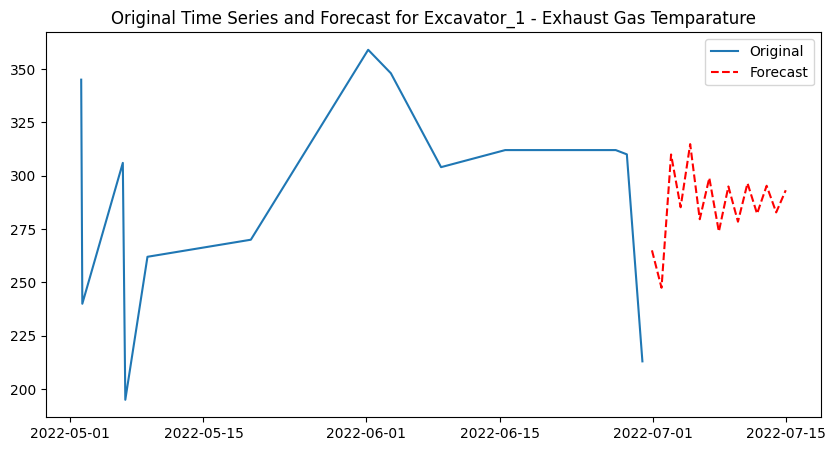

In [32]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Convert 'Time' to datetime
sorted_df['Time'] = pd.to_datetime(sorted_df['Time'])

# Filter for a specific machine and parameter
machine = 'Excavator_1'
parameter = 'Exhaust Gas Temparature'
filtered_df = sorted_df[(sorted_df['Machine'] == machine) & (sorted_df['Parameter'] == parameter)]

# Ensure the data is sorted by time
filtered_df = filtered_df.sort_values('Time')

# Set 'Time' as index
filtered_df.set_index('Time', inplace=True)

# Fit the ARIMA model
model = ARIMA(filtered_df['Value'], order=(3,1,2))
model_fit = model.fit()

# Forecast the next 5 values
forecast_steps = 15
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print(f"Forecasted next {forecast_steps} values:\n{forecast}")

# Create a datetime index for the forecast
forecast_index = pd.date_range(start=filtered_df.index[-1], periods=forecast_steps+1, inclusive='right')

# Plot the forecasted values along with the original series
plt.figure(figsize=(10, 5))
plt.plot(filtered_df['Value'], label='Original')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', color='red')
plt.legend()
plt.title(f'Original Time Series and Forecast for {machine} - {parameter}')
plt.show()

<Figure size 1000x500 with 0 Axes>

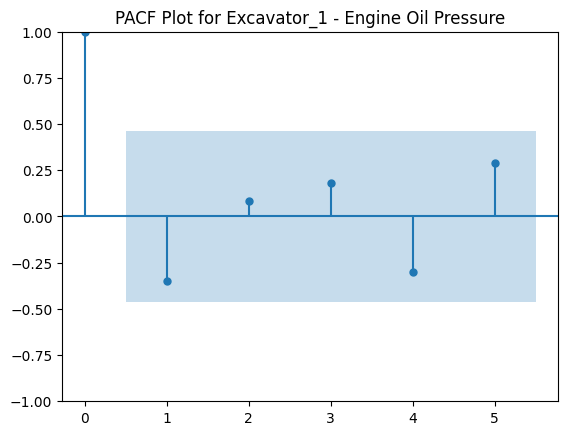

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Convert 'Time' to datetime
sorted_df['Time'] = pd.to_datetime(sorted_df['Time'])

# Filter for a specific machine and parameter
machine = 'Excavator_1'
parameter = 'Engine Oil Pressure'
filtered_df = sorted_df[(sorted_df['Machine'] == machine) & (sorted_df['Parameter'] == parameter)]

# Ensure the data is sorted by time
filtered_df = filtered_df.sort_values('Time')

# Set 'Time' as index
filtered_df.set_index('Time', inplace=True)

# Check the number of data points
num_data_points = len(filtered_df)

# Determine an appropriate number of lags (less than half of the sample size)
max_lags = min(5, num_data_points - 1)  # Adjusted to 5 or less than the number of data points

# Plot the PACF with adjusted lags
plt.figure(figsize=(10, 5))
plot_pacf(filtered_df['Value'].dropna(), lags=max_lags, method='ywm')  
plt.title(f'PACF Plot for {machine} - {parameter}')
plt.show()


In [ ]:
# Determine an appropriate number of lags (less than half of the sample size)
  # Example: Set maximum lags to 10 or half of the data points




c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python312\Lib\site-packages\statsmo

Forecasted next 15 values:
13    265.012534
14    247.498320
15    309.937143
16    285.213148
17    314.786506
18    279.591556
19    298.956056
20    273.806378
21    294.950122
22    278.444255
23    296.474570
24    282.176493
25    295.282063
26    282.799168
27    293.183708
Name: predicted_mean, dtype: float64


c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


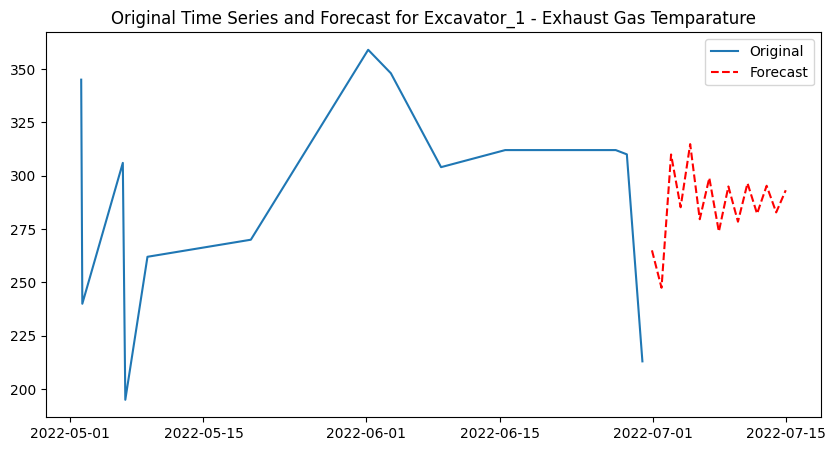

ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

In [60]:
import socket

sorted_df['Time'] = pd.to_datetime(sorted_df['Time'])

machine = 'Excavator_1'
parameter = 'Exhaust Gas Temparature'
filtered_df = sorted_df[(sorted_df['Machine'] == machine) & (sorted_df['Parameter'] == parameter)]

filtered_df = filtered_df.sort_values('Time')

filtered_df.set_index('Time', inplace=True)

model = ARIMA(filtered_df['Value'], order=(3,1,2))
model_fit = model.fit()

forecast_steps = 15
forecast = model_fit.forecast(steps=forecast_steps)

print(f"Forecasted next {forecast_steps} values:\n{forecast}")

forecast_index = pd.date_range(start=filtered_df.index[-1], periods=forecast_steps+1, inclusive='right')

plt.figure(figsize=(10, 5))
plt.plot(filtered_df['Value'], label='Original')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', color='red')
plt.legend()
plt.title(f'Original Time Series and Forecast for {machine} - {parameter}')
plt.show()

threshold = 360

failure_warning = any(forecast > threshold)

report = f"""
Report on Forecasting Exhaust Gas Temperature for {machine}

Forecasted Values:
{forecast.to_list()}

Summary Statistics:
Mean of forecasted values: {forecast.mean()}
Standard Deviation of forecasted values: {forecast.std()}
"""

if failure_warning:
    report += f"\nWARNING: One or more forecasted values exceed the threshold of {threshold}. This component is about to fail in some days."
else :
    report += f'\nThe component is currently in good condition.'

# %%
# Write the report to a text file
with open(r'c:\Users\Admin\Downloads\Forecast_Report_Excavator_1_Exhaust_Gas_Temperature.txt', 'w') as file:
    file.write(report)

# send the text to server
client_socket = socket.socket()

client_socket.connect(('172.20.10.3',1080))

data = report.encode('utf-8')
client_socket.send(data)

received_data = client_socket.recv(1024).decode('utf-8')
print(received_data)


print("Report has been saved successfully.")